In [36]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..", "..")
MODULES_PATH = os.path.join(BASE_PATH, "modules")
METRICS_PATH = os.path.join(BASE_PATH, "metrics")

In [39]:
sys.path.append(MODULES_PATH)
sys.path.append(os.path.join(BASE_PATH, "tf_al"))

In [40]:
from tf_al import ExperimentSuitMetrics
from utils import MetricsTransformer, Frame, ExperimentFrame

In [42]:
dtypes = {
    "run": int,
    "iteration": int,
    "train_time": float,
    "eval_sparse_categorical_crossentropy": float,
    "eval_sparse_categorical_accuracy": float,
    "query_time": float,
    "labeled_pool_size": int,
    "unlabeled_pool_size": int,
    "method": str
}

In [8]:
#train_loss train_sparse_categorical_accuracy train_time query_time eval_sparse_categorical_crossentropy eval_sparse_categorical_accuracy eval_time indices_selected iteration labeled_pool_size unlabeled_pool_size

In [325]:
base_experiment_path = os.path.join(METRICS_PATH, "temp_1")
metrics_handler = ExperimentSuitMetrics(base_experiment_path)
df_mp = MetricsTransformer.load_from_dir(metrics_handler, "moment_propagation", dtype=dtypes)

<AxesSubplot:xlabel='labeled_pool_size', ylabel='eval_sparse_categorical_accuracy'>

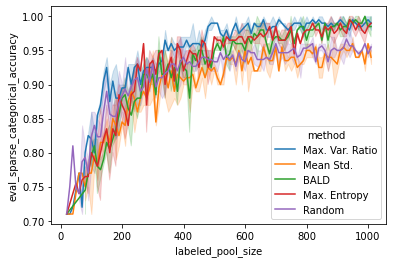

In [326]:
selector = df_mp["eval_sparse_categorical_accuracy"] > .7
sns.lineplot(data=df_mp[selector], x="labeled_pool_size", y="eval_sparse_categorical_accuracy", hue="method")

In [315]:
%autoreload 2
from utils import ExperimentFrame, FrameScores
df_mp = MetricsTransformer.load_from_dir(metrics_handler, "moment_propagation", dtype=dtypes)
scores = FrameScores(accuracy_column="eval_sparse_categorical_accuracy")
frame = ExperimentFrame(df_mp, scores=scores)

In [330]:
frame.get_mean_frame()

,model,method,iteration,run,train_time,std_query_time,mean_query_time,mean_qeff,query_time,eval_sparse_categorical_crossentropy,std_leff,mean_leff,eval_sparse_categorical_accuracy,labeled_pool_size,unlabeled_pool_size
0,Moment Propagation,BALD,1,0.5,1.333747,0.637213,9.066388,0.0,9.288025,1.328152,0.0,1.000000,0.580,20.0,59870.0
1,Moment Propagation,BALD,2,0.5,1.594857,0.637213,9.066388,0.0,8.954049,1.301359,0.0,0.919881,0.600,30.0,59860.0
2,Moment Propagation,BALD,3,0.5,1.710547,0.637213,9.066388,0.0,9.241346,1.595517,0.0,0.856400,0.580,40.0,59850.0
3,Moment Propagation,BALD,4,0.5,1.979448,0.637213,9.066388,0.0,8.995358,1.195858,0.0,0.900000,0.645,50.0,59840.0
4,Moment Propagation,BALD,5,0.5,2.145405,0.637213,9.066388,0.0,9.362517,1.139061,0.0,0.865205,0.640,60.0,59830.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Moment Propagation,Random,96,0.5,19.690381,0.004401,0.044911,1.0,0.040388,0.182352,0.0,1.000000,0.945,970.0,58920.0
96,Moment Propagation,Random,97,0.5,20.318847,0.004401,0.044911,1.0,0.041403,0.170009,0.0,1.000000,0.950,980.0,58910.0
97,Moment Propagation,Random,98,0.5,20.462667,0.004401,0.044911,1.0,0.045166,0.176178,0.0,1.000000,0.960,990.0,58900.0
98,Moment Propagation,Random,99,0.5,21.137655,0.004401,0.044911,1.0,0.042180,0.194683,0.0,1.000000,0.945,1000.0,58890.0


In [331]:
mp_mean = mean = frame.get_mean_frame()

<AxesSubplot:xlabel='method', ylabel='query_time'>

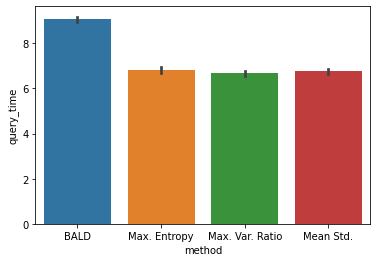

In [334]:
sns.barplot(data=Frame.filter(mp_mean, {"method": "Random"}), x="method", y="query_time")

<AxesSubplot:xlabel='method', ylabel='mean_qeff'>

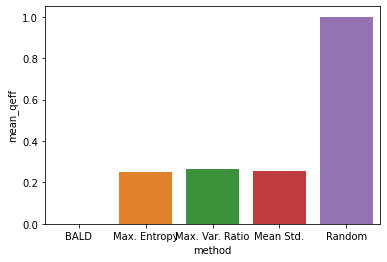

In [289]:
sns.barplot(data=mp_mean, x="method", y="mean_qeff")

<AxesSubplot:xlabel='labeled_pool_size', ylabel='eval_sparse_categorical_accuracy'>

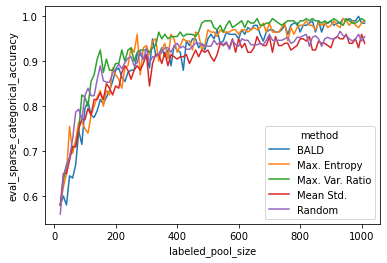

In [271]:
sns.lineplot(data=mp_mean, x="labeled_pool_size", y="eval_sparse_categorical_accuracy", hue="method")

In [102]:
frame.get_mean_frame(method="Random")

AttributeError: 'str' object has no attribute 'groupby'

In [ ]:
Frame.mean(, "run")

In [101]:
sns.lineplot(data=, x="labeled_pool_size", y="eval_sparse_categorical_accuracy", hue="method")

AttributeError: 'str' object has no attribute 'groupby'

<AxesSubplot:xlabel='labeled_pool_size', ylabel='mean_leff'>

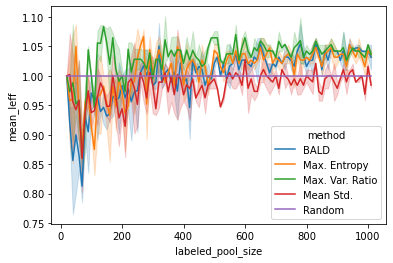

In [87]:
sns.lineplot(data=frame.get_frame(), x="labeled_pool_size", y="mean_leff", hue="method")

In [74]:
mean_ar = np.array([9.04820891, 9.04820891])
(mean_ar-np.min(mean_ar))/(np.max(mean_ar)-np.min(mean_ar))

/tmp/ipykernel_25557/1840450400.py:2: RuntimeWarning: invalid value encountered in true_divide
  (mean_ar-np.min(mean_ar))/(np.max(mean_ar)-np.min(mean_ar))


array([nan, nan])

In [75]:
np.max(mean_ar)-np.min(mean_ar)

0.0

In [ ]:
ExperimentFrame()

In [14]:
bald_res = mp_methods[0]
rand_res = mp_methods[-1]
ratio_res = mp_methods[2]
entr_res = mp_methods[1]
std_res = mp_methods[3]

In [15]:
key = "eval_sparse_categorical_accuracy"
rand_acc = rand_res[key].to_numpy()
bald_acc = bald_res[key].to_numpy()
ratio_acc = ratio_res[key].to_numpy()
pool_size = bald_res["labeled_pool_size"]

bald_mean_leff, bald_std_leff = leff(bald_acc, rand_acc)
ratio_mean_leff, ratio_std_leff = leff(ratio_acc, rand_acc)
rand_mean_leff, rand_std_leff = leff(rand_acc, rand_acc)

In [16]:
accum = [bald_mean_leff[0]]
for val in bald_mean_leff[1:]:
    accum.append(accum[-1]+val)

In [17]:
df_bald_leff = pd.DataFrame({"leff": bald_mean_leff, "acc": bald_acc, "method": ["bald"]*len(bald_acc), "size": pool_size})
df_ratio_leff = pd.DataFrame({"leff": ratio_mean_leff, "acc": ratio_acc, "method": ["ratio"]*len(bald_acc), "size": pool_size})
df_random_leff = pd.DataFrame({"leff": rand_mean_leff, "acc": rand_acc, "method": ["random"]*len(rand_acc), "size": pool_size})

df_leff_test = pd.concat([df_bald_leff, df_ratio_leff, df_random_leff])

In [44]:
from tf_al.score import runtime

In [45]:
bald_qt = bald_res["query_time"].to_numpy()
rand_qt = rand_res["query_time"].to_numpy()
ratio_qt = ratio_res["query_time"].to_numpy()
std_qt = std_res["query_time"].to_numpy()
ent_qt = entr_res["query_time"].to_numpy()

In [48]:
pool_sizes = bald_res["unlabeled_pool_size"]
run_mean, run_std, runtime(bald_qt, pool_sizes)

(0.00015268572810579113, 9.820578162181209e-06)

In [19]:

bald_mean = np.mean(bald_qt/pool_sizes)
rand_mean = np.mean(rand_qt/pool_sizes)
ratio_mean = np.mean(ratio_qt/pool_sizes)
ent_mean = np.mean(ent_qt/pool_sizes)
std_mean = np.mean(std_qt/pool_sizes)

In [20]:
print("Times")
print("Ratios: ", ratio_mean)
print("Bald: ", bald_mean)
print("Std: ", std_mean)
print("Entropy: ", ent_mean)
print("Random: ", rand_mean)

Times
Ratios:  0.00011220628071031985
Bald:  0.00015268572810579113
Std:  0.00011382029332352505
Entropy:  0.00011472658660925107
Random:  7.557685550409977e-07


In [21]:
values = [ratio_mean, bald_mean, std_mean, ent_mean]
labels = ["ratio", "bald", "std", "entropy"]

In [22]:
res = (np.array(values)-np.min(values))/(np.max(values)-np.min(values))
res = np.abs(res -1)

In [23]:
df = pd.DataFrame({"time": res, "method": labels})

[Text(0, 0.5, 'Query efficency'), Text(0.5, 0, 'Method')]

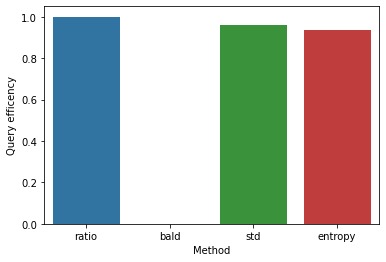

In [24]:

ax = sns.barplot(data=df, x="method", y="time")
ax.set(ylabel="Query efficency", xlabel="Method")

In [25]:
bald_qeff = (bald_mean-rand_mean)/bald_mean
ratio_qeff = (ratio_mean-rand_mean)/ratio_mean
ent_qeff = (ent_mean-rand_mean)/ent_mean
std_qeff = (std_mean-rand_mean)/std_mean

In [26]:
ratio_mean

0.00011220628071031985

In [27]:
bald_mean/ratio_mean

1.3607591940416959

In [28]:
()

()

In [29]:
sum_qeff = ((ratio_qeff+ent_qeff+std_qeff)/3)
(bald_qeff-sum_qeff)/max(sum_qeff, bald_qeff)

0.0017130169207048868

In [30]:
(bald_qeff/ratio_qeff)/2

0.5008989031139479

In [31]:
(ratio_qeff/bald_qeff)/2

0.4991027100395312

In [32]:
bald_qeff

0.9950501689685276

<AxesSubplot:xlabel='size', ylabel='leff'>

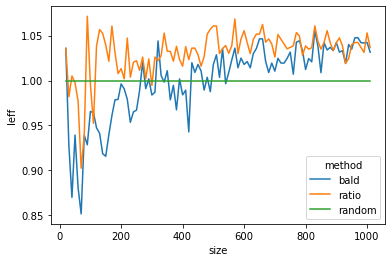

In [33]:
sns.lineplot(data=df_leff_test, x="size", y="leff", hue="method")

<AxesSubplot:xlabel='labeled_pool_size', ylabel='eval_sparse_categorical_accuracy'>

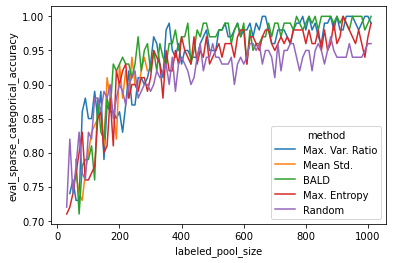

In [34]:
df_mc = MetricsTransformer.load_from_dir(metrics_handler, "mc_dropout", dtype=dtypes)
selector = df_mc["eval_sparse_categorical_accuracy"] > .7
sns.lineplot(data=df_mc[selector], x="labeled_pool_size", y="eval_sparse_categorical_accuracy", hue="method")

In [35]:
df_mc_methods = Frame.split_by(df_mc, "method")